# Data Analysis

## Contents

1. **[Introduction](#Introduction)**  
    1.1. Type of data  
    1.2. Data structures  
    1.3. Data quality  
    1.4. Data similarity measures
2. [**Data preprocessing**](#Data-preprocessing)  
    2.1. Feature scaling  
    2.2. Encoding categorical features  
    2.3. Curse of dimensionality  
    2.3. Dealing with outliers  
    2.4. Ranking  
    2.5. Non-linear transformations
3. [**Feature engineering**](#Feature-engineering)  
    3.1. Numeric features  
    3.2. Categorical features  
    3.3. Missing values

# Introduction 
(26/03 - 02/04)

Attributi possono essere qualitativi/quantitativi. Per attributi quantitativi va tenuta in considerazione l'unità di misura (si pensi ad una variabile altezza presente in due copie di un dataset: una in Europa, misurata in *cm* e l'altra in America ma convertita in *feet*. Questo fattore va tenuto in conto, ad esempio nel momento in cui decida di addestrare il mio algoritmo su un dataset Europeo, e successivamente testi il mio algoritmo con dati aventi unità di misura differente.

## Proprietà fondamentali
Attributi possono essere distinti in:
- **Nominali:** ID, colore, zip codes...
- **Ordinali:** il loro valore è una categoria ordinata e la distanza tra le categorie non è nota, per esempio altezza (basso, medio, alto), ranking (da 1 a 10).
- **Interval:** attributi su cui ha senso calcolare delle differenze (es: temperatura, data...)
- **Ratio:** attributi su cui ha senso fare dei rapporti dei loro valori (es: temperatura in Kelvin perché non include lo zero, lunghezza, tempo...)

Questa classificazione è sostanzialmente basata sul tipo di operazioni che posso fare sugli attributi:
- Uguaglianza: $=, \neq$
- Confronto ordinale: $<, \le, >, \ge$
- Addizione: $+,-$
- Moltiplicazione: $\times, \div$ 

Le **operazioni** effettuabili sui miei dati determineranno le tecniche di machine learning e data mining utilizzabili. Alcuni esempi di operazioni effettuabili:
- Nominali: moda, entropia, test di correlazione $\chi^2$...
- Ordinali: mediana, calcolo di percentili, correlazione dei ranghi, test dei segni...
- Interval: media, deviazione standard, coefficiente di Pearson, t test, F test...
- Ratio: media geometrica, media armonica, variazione percentuale...

Le **trasformazioni** effettuabili sui miei dati:
- Nominali: permutazioni dei valori (se gli ID dei miei dipendenti venissero riassegnati farebbe qualche differenza?)
- Ordinali: qualsiasi cambio dei valori che mantenga l'ordinamento (quindi $value_{new} = f(value_{old}$ tale che $f$ sia monotona)
- Interval: qualsiasi operazione che mantenga la proporzione tra i vari intervalli (una funzione affine ad esempio)
- Ratio: qualsiasi operazione che mantenga il rapporto dei vari valori (come una moltiplicazione per una costante)

## Attributi discreti e continui
Discreti possono assumere un insieme finito di valori, Continui possono assumere un insieme infinito di valori (tenere comunque a mente che la rappresentazione e memorizzazione su un calcolatore comporterà una discretizzazione di questi).

## Tipologie di strutture dati
Il dati possono essere memorizzati secondo diverse tipologie di struture che determineranno gli algoritmi di apprendimento applicabili
- Un insieme di **record**: 
    - dati matriciali: ciascun record è costituito da un insieme fisso di attributi
    - testuali: ad esempio gli attributi possono essere delle parole e i record possono corrispondere a documenti. In ciascuna cella avrò il numero di occorrenze di quella parola per quel particolare documento.
    - transizioni di stato
- Un **grafo**: WWW, strutture molecolari...
- Dati **ordinati**: dati spaziali, temporali, sequenze...

## Qualità dei dati
Le misure sono tipicamente affette da rumore, quindi questo fattore è da tenere presente. Prima di fare una qualunque analisi del nostro sistema è opportuno porsi delle domande: è presente del rumore nel nostro dataset? In quale misura? 

Vi sono degli *outliers* nel nostro dataset? Eventualmente potrei utilizzare la mediana piuttosto che la media, che è meno influenzata dalla presenza di outliers. In tecniche di apprendimento non supervisionato, come il clustering, la presenza di outliers può influenzare notevolmente l'accuratezza del risultato prodotto dall'algoritmo. Potrei quindi decidere di filtrare eventuali outliers.

Va tenuto conto anche di valori mancanti (è necessario capire se la loro mancanza abbia un certo significato, in modo da poter associare un valore di default evaentualmente) o duplicati. Spesso gli algoritmi di machine learning escludono i record con valori mancanti, ma questo potrebbe causare notevoli problemi qualora il numero di dati mancanti sia alto. Il motivo dell'assenza di alcuni valori può essere dovuto a:
- informazioni non raccolte: ad esempio in un questionario una persona potrebbe non voler specificare il sesso.
- informazioni non applicabili: un salario ad un bambino

In questi casi potrei cercare di dedurre il valore inferendolo da altri record simili a quello con il valore mancante oppure a partire da altri attributi dello stesso record (dall'altezza e dall'indice di massa corporea potrei inferire il peso). Posso cercare di eliminare record con troppi valori mancanti, fare una stima, ignorare tale attributo, rimpiazzarli con valori quantitativi con una probabilità associata.

Eventuali duplicati (o dati molto simili) vanno gestiti attraverso un processo di **data cleaning**.

## Similarità e Dissimilarità dei dati
La **similarità** definisce quanto due campioni siano simili; è spesso misurata nel range $[0,1]$. La **dissimilarità** indica quanto due campioni non si assomiglino. Più questa è bassa, più i campioni si assomigliano (se sono identici, la dissimilarità sarà 0). Il limite superiore può variare, ad esempio può essere utilizzata la distanza euclidea tra due punti come misura di dissimilarità.

A seconda del tipo di attributi possiamo individuare:
- **Nominali:** possiamo verificare se questi siano uguali o meno.  
    - Dissimilarità: $d=\begin{cases}0 & \text{if } p=q \\ 1 & \text{if } p\neq q \end{cases}$
    - Similarità:    $s=\begin{cases}1 & \text{if } p=q \\ 0 & \text{if } p\neq q \end{cases}$
- **Ordinali:** avendo un ordinamento tra questi $n$ elementi, possiamo utilizzare i loro indici ($|p-q|$ rappresenta la distanza in termini di numero di elementi tra $p$ e $q$. Se questi coincidono, allora $|p-q|=0$, se questi sono agli estremi opposti, allora $|p-q|=n-1$
    - Dissimilarità: $d = \frac{|p-q|}{n-1}$
    - Similarità:    $s = 1 - \frac{|p-q|}{n-1}$
- **Interval o Ratio:** 
    - Dissimilarità: $d = |p-q|$ (distanza euclidea, ma possono anche essercene altre)
    - Similarità:    $s = -d$, $s = \frac{1}{1+d}$ or $s = 1 - \frac{d - min_d}{max_d - min_d}$
    
Come distanza per attributi di tipo interval, possiamo utilizzare la **distanza euclidea** $d = \sqrt{\sum_{i=1}^{n}{\left(p_i - q_i \right)^2}}$, dove $n$ rappresenta il numero di features (dimensioni). In questo caso la standardizzazione risulta necessaria in modo che ciascuna feature contribuisca in ugual modo nel calcolo della distanza. È quindi possibile costruire una matrice di similarità o di dissimilarità andando a misurare le distanze tra tutti i dati, secondo i valori di loro attributi di tipo interval.

Una generalizzazione di distanza Euclidea e della distanza di Manhattan è la **distanza di Minkowski**

$$d = \left(\sum_{i=1}^{n}{|p_i - q_i |^r}\right)^{\frac{1}{r}}$$

dove $r$ è un parametro:
- $r=1$: norma $l_1$
- $r=2$: distanza Euclidea
- $r\rightarrow\infty$: norma $l_\infty$

Una distanza deve rispettare le proprietà di definizione positiva, simmetria e disuguaglianza triangolare.

Anche la similarità deve rispettare alcune proprietà: 
- $s(p,q)=1 \Leftrightarrow p=q$ (massima similarità)
- $s(p,q) = s(q,p) \; \forall q,p$ (simmetria)
di conseguenza la similarità non è una distanza.

### Similarità tra vettori binari
Per quanto riguarda la **similarità tra vettori binari** (dove $p$ e $q$ hanno solo attributi binari) possiamo definire il **Simple Matching Coefficient** e il **coefficiente di Jaccard**:

- $M_{00}$: numero di attributi dove $p=0$ e $q=0$
- $M_{01}$: numero di attributi dove $p=0$ e $q=1$
- $M_{10}$: numero di attributi dove $p=1$ e $q=0$
- $M_{11}$: numero di attributi dove $p=1$ e $q=1$

$$SMC = \frac{\text{numero di matches}}{\text{numero di attributi}} = \frac{M_{11} + M_{00}}{M_{01} +M_{10} +M_{11} +M_{00}}$$

$$J = \frac{\text{numero di } M_{11} \text{ matches}}{\text{numero di attributi non entrambi zero}} = \frac{M_{11}}{M_{01} +M_{10} +M_{11}}$$

#### Esempio
$p = 1000000000$

$q = 0000001001$
- $M_{00}$: 7
- $M_{01}$: 2
- $M_{10}$: 1
- $M_{11}$: 0

$SMC = \frac{7+0}{7+2+1+0} = 0.7$

$J = \frac{0}{2+1+0} = 0$

### Similarità del coseno
Dati due vettori $d_1,d_2$ si ha:

$$\cos(d_1,d_2) = \frac{(d_1 \bullet d_2)}{||d_1|| \cdot ||d_2||}$$

dove $\bullet$ indica il prodotto scalare e $||d||$ indica la lunghezza del vettore (norma).

#### Esempio
$d_1 = 3205000200$

$d_2 = 1000000102$

$\cos(d_1,d_2) = \frac{5}{6.481+2.245} = 0.3150$

### Misure di correlazione
Per calcolare la correlazione, prima si standardizzano $p$ e $q$, poi si calcola il prodotto scalare:

$$p'_k=\frac{\left(p_k-\mu_p\right)}{\sigma_p} \quad q'_k=\frac{\left(q_k-\mu_q\right)}{\sigma_q}$$

$$correlation(p,q) = p'\bullet q'$$

## Tipologie di errori
Distinguiamo
- Pitfalls: errori non scontati
- Pratfalls: errori macroscopici, grossolani

È buona pratica essere sempre scettici sui dati a disposizione.

#### Esempio
Carico in weka il dataset `weather-nominal.arff` e uso gli algoritmi:
- `OneR`: albero decisionale ad un livello
- `J48`: implementazione degli alberi decisionali (C4.5)

`OneR` ottiene un'accuratezza pari al 43% (utilizzando 10-fold cross validation) mentre `J48` ottiene un'accuratezza pari al 50%. 

Cambiamo ora il valore della variabile `outlook` assegnando `unknown` alle prime 4 istanze la cui label (variable `play`) corrispondente è `no`. Questo può essere fatto andando nella sezione `preprocess`. L'accuratezza di `OneR` sale al 93%, mentre quella di `J48` rimane al 50% (non usa la variabile `utlook`per effettuare gli split).


# Introduzione a WEKA
Utilizzeremo WEKA, un software all'avanguardia 🙃 e al passo con i tempi 🙃🙃 la cui ultima versione rilasciata risale al 2013 🙃🙃🙃.

Dopo averlo installato e aperto, utilizziamo il modulo `Explorer`e clicchiamo `Open > Cartella di installazione/data` dove troveremo alcuni dataset di esempio in formato `.arff` (sostanzialmente dei `.csv` con un'intestazione che descrive se gli attributi siano nominali, ordinali...). Scegliamo il dataset `iris` (descritto [QUI](https://archive.ics.uci.edu/ml/datasets/Iris)). 

Nella sezione `Visualize` possiamo vedere combinazioni di attributi e come ciascun attributo sia distribuito.

- Classe (setosa, versicolor, virginica): attributo nominale
- Petal Length: attributo interval
- Petal witdh: attributo interval

Nella sezione *Classify* possiamo segliere un algoritmo di classificazione. Scegliamo `rules/ZeroR`: classificazione in base all'attributo maggiormente frequente (in questo caso, sono uniformemente distribuiti, 50 record per tipo di fiore). Selezionando `Start` vengono visualizzati i risulati della classificazione, tra cui la **confusion matrix** e misure di accuratezza (Precision, Recall, ROC area...). 

Sempre nella sezione *Classify* è possibile selezionare un algoritmo di classificazione diverso, ad esempio l'albero decisionale `trees/J48` che corrisponde all'implementazione dell'algoritmo **C4.5**. Nella sezione *Test Options* possiamo scegliere quale dataset utilizzare per effettuare la validazione del modello (scegliendo *Cross-validation* si opera una **stratified** cross validation).

Nelle opzioni (*more options*) è possibile indicare il `Random seed` che determina come verranno mescolati i records in modo da poter ripetere un esperimento con lo stesso riordinamento (non variando il seed).

Cliccando sul campo in cui è visualizzato il nome dell'algoritmo utilizzato è possibile scegliere la sua configurazione (ad esempio scegliere il `minNumSplit`). Se dovessi aumentare eccessivamente la complessità dell'albero (ad esempio non faccio pruning, oppure impostando `minNumSplit=1`).

# Data preprocessing

Prima di applicare algoritmi di machine learning potrei effettuare operazioni di preprocessing dei dati al fine di facilitare la successiva gestione di tali dati.
- **Aggregazione:** potrei cercare di aggregare tra loro più attributi o più record per ridurre il numero di dati, per effettuare cambi di scala (aggregare paesi in regioni, regioni in nazioni...) o per avere dati più stabili, con meno variazioni.
- **Campionamento (sampling):** quando ho un dataset molto grande posso fare un campionamento del dataset e applicare inizialmente le tecniche di machine learning su un dataset ridotto (analogamente per la valutazione del modello ottenuto). Tecniche di **stratified cross validation** (che mantengono le proprietà statistiche del dataset originale) sono consigliate a questo scopo. Il campionamento può essere casuale, senza reinserimento, con reinserimento, *stratified* (divido i dati in partizioni ed estraggo campioni casuali da ciascuna partizione)...
[Quanto deve essere grande il sample?](https://en.wikipedia.org/wiki/Sample_size_determination) In genere più è grande, più è alta la precisione nella stima di parametri sconosciuti. Questo fenomeno è descritto da varie leggi matematiche, tra cui la legge dei grandi numeri e il teorema del limite centrale.

- **Dimensionality reduction:** in modo da poter usare tecniche che lavorino solo sugli attributi principali
- **Feature subset selection:** cercare di identificare le feature (variabili) più rilevanti e quali invece contengano rumore
- **Feature creation:** ho una conoscenza sul dominio che potrei sfruttare per inserire nuovi attributi nel mio dataset (ad esempio da altezza e peso ricavare l'indice di massa corporea)
- **Attribute transformation:** un peso di una persona in milligrammi potrebbe essere trasformato in kilogrammi. Possono essere applicati trasformazioni lineari o non-lineari per favorire l'apprendimento (esempio: trasformazione logaritmica per passare da un modello esponenziale ad uno lineare).
- **Discretization and Binarization:** se so che gli attributi numerici sono afflitti da rumore, potrei decidere di discretizzare questi valori.

## Feature scaling

There are algorithms that are sensitive to feature scaling, meaning that varying the scale of a feature may change the behavior of the algorithm itself:
- k-nearest neighbors: if we want all features to contribute equally, we need to scale them to a common range.
- k-means
- logistic regression, SVMs, Neural networks, etc.: gradient descent can be much quicker if features are properly scaled.
- linear discriminant analysis, principal component analysis: since we want to find orthogonal directions of maximizing the variance, we want features on the same scale, in order not to emphasize certain variables more.

On the contrary, tree-based algorithms such as the CART decision tree are scale-invariant, in the sense that they aim at finding the optimal threshold to split a certain feature, regardless of the scale.

There exists many methods to perform feature scaling, such as:

- Rescaling (min-max normalization)
- Mean normalization
- Standardization
- Scaling to unit length

### Min-max normalization

It consists in rescaling the range of possible values to $[0,1]$ or $[-1,1]$.

\begin{equation}
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
\end{equation}

### Mean normalization

\begin{equation}
x' = \frac{x - \mu_x}{\max(x) - \min(x)}
\end{equation}

where $\mu_x$ being the sample mean of $x$.

### Standardization

Mean normalization makes the normalized feature to have zero mean and unit variance.

\begin{equation}
x' = \frac{x - \mu_x}{\sigma_x}
\end{equation}

where $\mu_x$ is the sample mean and $\sigma_x$ is the sample standard deviation of $x$.

### Scaling to unit length

It consists in scaling a feature vector such that the resulting one has length one.

\begin{equation}
x' = \frac{x}{\Vert x \Vert}
\end{equation}

#### Example

In the following example, we will compare how different scalers (respectively the Standard scaler and the Min-max scaler) affect the performance of logistic regression.

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

data = load_wine(as_frame=True)
X = data.data[['alcohol','malic_acid']]
y = data.target
X.describe()

,alcohol,malic_acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

# fit logistic regression without scaling
model = LogisticRegression()
model.fit(X_train, y_train)

# compute root MSE on test set
rmse = [model.score(X_test, y_test)]

# build pipelines using standard scaler and min-max scaler
pipelines = [make_pipeline(MinMaxScaler(), LogisticRegression()),
             make_pipeline(StandardScaler(), LogisticRegression())]

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
df_lr = pd.DataFrame({'RMSE':rmse}, index=['Original','Min-Max','Normalized'])
df_lr

,RMSE
Original,0.796296
Min-Max,0.745356
Normalized,0.680414


As we can see, by normalizing the two features, we obtained a smaller root mean squared error on the test set, compared to the score we obtained on the unscaled test set.

## Encoding categorical features

Categorical features can be efficiently coded as integers, by replacing the categories by an integer. For instance, consider these 3 categorical features that a person could have:
```python
Sex = ['male', 'female']
Occupation = ['student', 'worker', 'unemployed']
From = ['Europe', 'Asia', 'North-America', 'South-America', 'Africa', 'Australia', 'Antarctica']
```

We can convert each of these categories into an integer value by using [`sklearn.preprocessing.OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder):

In [2]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[['male', 'female'], 
                                 ['student', 'worker', 'unemployed'], 
                                 ['Europe', 'Asia', 'North-America', 'South-America', 'Africa', 'Australia', 'Antarctica']])
X = [['male', 'unemployed', 'North-America'], ['female', 'student', 'Africa']]
enc.fit(X)
enc.transform(X)

array([[0., 2., 2.],
       [1., 0., 4.]])

In general, such representation can't be used directly with estimators because ordinal encoding creates a fictional ordinal relationship in the data. For this reason, in order to improve the performance of the learning algorithm we will use, **one-hot encoding** is often applied to categorical variables.

### Frequency encoding

Frequency encoding consists into associating to each value a categorical feature may take, the corresponding frequency in the dataset. For instance, assume that the titanic dataset has a categorical feature called `Embarked`:

```python
encoding = titanic.groupby('Embarked').size()
encoding = encoding / len(titanic)
titanic['Embarked_enc'] = titanic.Embarked.map(encoding)
```

### One-hot encoding

One-hot encoding consists in creating, for each unique value in the original categorical column, a new column representing a binary feature that can take only two values: 1, if in the original column, that entry takes value equal to the one that this column represents, 0 otherwise.

For instance, consider an instance having `Occupation = worker`. Therefore, by one-hot encoding the categorical columns, the `Occupation` feature will give birth to 3 new columns, one for each value that `Occupation` may take.

| student | worker | unemployed |
|---------|--------|------------|
| 0       | 1      | 0          |

One-hot encoding can be performed using [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) or [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories=[['male', 'female'], 
                                ['student', 'worker', 'unemployed'], 
                                ['Europe', 'Asia', 'North-America', 'South-America', 'Africa', 'Australia', 'Antarctica']])
X = [['male', 'unemployed', 'North-America'], ['female', 'student', 'Africa']]
enc.fit(X)
enc.transform(X).toarray()

array([[1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Note that not every model requires to one-hot encode categorical features. For instance, random forests, can work directly with categorical, without requiring those features to be transformed at all. Note also that, categorical features with many values would end up in many new binary features, resulting into a very sparse matrix. In that case, we can store just the non-zero elements using **sparse matrices**, reducing the memory occupation by a lot.

## Curse of dimensionality
Si tratta di un fenomeno che sorge lavorando con dati in spazi con un alto numero di dimensioni. Al crescere del numero di dimensioni, lo spazio cresce esponenzialmente e i dati diventano presto sparsi (tanto volume non occupato dalle istanze del data set). Supponiamo che ciascuna variabile (ciascuna dimensione) possa assumere 2 valori. Con $n$ variabili si avrebbero $2^n$ possibili combinazioni dei loro valori. Con più variabili che osservazioni si incorre nel rischio di overfitting. Nelle tecniche di clustering, con un elevato numero di dimensioni accade che i punti (dati) tendono a risultare equidistanti tra loro, vanificando i tentativi di formare dei cluster sulla base della vicinanza tra questi punti. 

Un esempio banale ma esplicativo di clustering: 8 caramelle (8 record). Si hanno due variabili binarie (assumono valore vero o falso) che ne descrivono il colore:  "rossastra" e "bluastra". 4 caramelle con colore tendende al rosso e 4 con colore tendente al blu.

|    | Rossastra | Bluastra |
|----|-----------|----------|
| c1 | 1         | 0        |
| c2 | 1         | 0        |
| c3 | 1         | 0        |
| c4 | 1         | 0        |
| c5 | 0         | 1        |
| c6 | 0         | 1        |
| c7 | 0         | 1        |
| c8 | 0         | 1        |

Non sarà difficile per l'algoritmo di clustering individuare due cluster. Pensiamo però ora di avere 8 variabili binarie che ne descrivono il colore più specificamente.

|    | Rossa | Arancio | Gialla | Fucsia |  Blu   | Azzurro | Verde | Viola |
|----|--------|---------|--------|--------|--------|---------|-------|-------|
| c1 | 1      | 0       | 0      | 0      | 0      | 0       | 0     | 0     |
| c2 | 0      | 1       | 0      | 0      | 0      | 0       | 0     | 0     |
| c3 | 0      | 0       | 1      | 0      | 0      | 0       | 0     | 0     |
| c4 | 0      | 0       | 0      | 1      | 0      | 0       | 0     | 0     |
| c5 | 0      | 0       | 0      | 0      | 1      | 0       | 0     | 0     |
| c6 | 0      | 0       | 0      | 0      | 0      | 1       | 0     | 0     |
| c7 | 0      | 0       | 0      | 0      | 0      | 0       | 1     | 0     |
| c8 | 0      | 0       | 0      | 0      | 0      | 0       | 0     | 1     |

L'algoritmo di clustering non è più in grado di individuare somiglianze (correlazioni tra variabili) tra alcune di queste caramelle.

È possibile ovviare a ciò utilizzando tecniche di ***dimensionality reduction*** come:
- **Principal Component Analysis (PCA)**:
- **Singular Value Decomposition:**
- **Feature Subset Selection:** si cerca di eliminare features ridondanti (esempio: prezzo di un prodotto e relativa imposta) o features poco significative (esempio: colore occhi in un problema di clustering dei clienti di un supermercato)

## Dealing with outliers

To protect a linear model from being affected by outliers we can *clip* features' values between within a specific range, choosing the lower bound and the upper bound as some percentiles of that features (e.g. first, and 99th percentile). This procedure is called ***winsorization*** and can be done in Python using [`scipy.stats.mstats.winsorize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html). An example is shown below:

<AxesSubplot:>

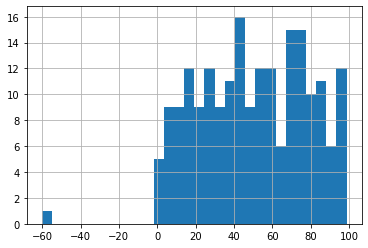

In [21]:
# generate data within a range
x = np.random.uniform(low=0, high=100, size=(200,))

# add outlier
x = np.append(x, -60)

# plot histogram
pd.Series(x).hist(bins=30)

<AxesSubplot:>

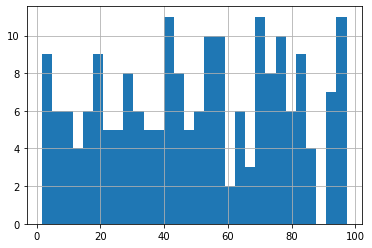

In [24]:
# compute 99% interval, clip and plot histogram
upper_bound, lower_bound = np.percentile(x, [1,99])
x = np.clip(x, upper_bound, lower_bound)

pd.Series(x).hist(bins=30)

## Ranking

Another useful preprocessing operation is *ranking*. [Ranking](https://en.wikipedia.org/wiki/Ranking) consists into performing a weak ordering of the values a feature takes. By doing this we move outliers closer to other values, defining a mapping between values and indexes. For instance:

In [32]:
from scipy.stats import rankdata

rankdata([10, 3, 1e-4, 50, 3])

array([4. , 2.5, 1. , 5. , 2.5])

Note that, in order to keep the same rank mapping also with the test set, we need to store the mapping computed with the training set. Alternatively, we can first concatenate the training with the test set, then compute the ranking of the ensemble.

## Non-linear transformations

Non-linear transformations of the values can help non-tree-based algorithms, such as neural nets, because they bring the values closer to their mean and make the values near zero a little more distinguishable. Examples are:
- Log transform

$$x' = \log(1+x)$$

- Rising to a power $< 1$

$$x' = \sqrt{x + 2/3}$$

# Feature engineering

## Numeric features

Numeric features can be extended by generating new ones, either with knowledge about the domain of the problem, or through *exploratory data analysis* (EDA). For example, if we had `height` and `width` features, we could generate a new `distance` variable by using Pitagora's theorem. Similarly, `squared_area` and `total_price` can be combined into an interaction features called `price_for_m2`, computing the price for square meter.

Another thing we may try, is to extract the fractional part of a decimal number. Variables such as `price` can benefit from this because factors such as people perception of prices could then be taken into account by the model.

| price | price_decimal_part |
|:-----:|:------------------:|
|  0.99 |         .99        |
|  6.49 |         .49        |
|  1.00 |         .00        |
|  9.98 |         .98        |

### Date and time features

Date and time are quite interesting features, because not only they are linear in nature, but they also have several different tiers, such as *year*, *day*, *week*... Features generated by datetime can be divided into two categories:
1. **Time moments in a period**: day number in the week, month, season, year, seconds, minutes, hours. This is useful to capture **repetitive patterns** in data. Another attribute of this type can be a boolean value indicating whether that day is a holiday.
2. **Time passed since a particular event**: this can be either 
    - **row-independent**: such as time past from a general moment for all data (e.g. from year 2000).
    - **row-dependent**: for instance, the number of days left until Christmas, or the days past since the last promotional campaign.
    
Generating features of this kind may return useful in tasks such as **churn prediction**, which consists in estimating the likelihood that a customer will churn (i.e. will stop paying for a service). Combining a feature like `last_purchase_date` with other relevant dates, into a new variable `date_diff`, can improve by a lot the model's performances.

### Coordinates features

When we deal with features involving coordinates (such as the position of a house), we can augment our dataset in many ways:
- Computing the distance from a certain relevant place, like an hospital, a school or a popular meeting place.
- Splitting the map into squares, and for every flat in each square, computing the distance from the most expensive flat in that area.
- Organizing data points into clusters, then use the centroid of each cluster as an important point from which to compute the distance.
- Computing aggregating statistics for objects' surrounding area (e.g. number of flats within a certain range, which can be interpreted as area's popularity).
- Transform coordinates by rotating them around a point.

## Categorical features

When dealing with categorical features, we can derive new ones by considering the interaction between the variables, so that the model can find optimal coefficient for interaction features and improve. This can be useful with non-tree-based models.
This can be done by concatenating the values of two or more features, and then one-hot encoding them.

Assume to have this data, where the interaction feature `sex_fav_color` between `sex` and `fav_color` has already been built.

| sex    | fav_color | sex_fav_color    |
|--------|-----------|------------------|
| male   | green     | male_green       |
| female | black     | female_black     |
| female | turquoise | female_turquoise |
| female | black     | female_black     |

By one-hot encoding the `sex_fav_color` variable, we obtain:

| female_black | female_turquoise | male_green |
|--------------|------------------|------------|
| 0            | 0                | 1          |
| 1            | 0                | 0          |
| 0            | 1                | 0          |
| 1            | 0                | 0          |

## Missing values

We can consider as missing values not only `NaN` values, but also empty strings, special values like `-1`, outliers like `-999` and many more. The presence of missing values can provide insights on why they occurred. The first step is to identify them, and that can be done by inspecting the histograms of the variables.

Once we identified them, we must decide what to do:
- Replace them with a value outside of the feature's values range (it can help tree-based models, but may worsen the performance of linar models or neural networks).
- Replace them with the mean/median of the values of the feature involved.
- Add new boolean feature `is_missing` according the the presence/absence of the value.
- Reconstruct their value (e.g. with time series, sometimes it can make sense to interpolate nearby points in order to estimate a reasonable value for the missing one.

Be careful when generating new features using missing values: for example, if we chose to replace a missing value of a numeric feature with `-999`, then we can't encode a different categorical feature using the average values from the numeric feature, because we would end up in a situation like this, doing more harm than good:

| categorical_feature | numeric_feature | numeric_filled | categorical_encoded |
|:-------------------:|:---------------:|:--------------:|:-------------------:|
|          A          |        1        |        1       |         1.5         |
|          A          |        4        |        4       |         1.5         |
|          A          |        2        |        2       |         1.5         |
|          A          |        -1       |       -1       |         1.5         |
|          B          |        9        |        9       |         -495        |
|          B          |       NaN       |      -999      |         -495        |

In conclusion, there are algorithms, like XGBoost that are able to handle NaNs by themselves.

## Feature extraction from text and images

Sometimes some of our dataset's attributes may be text attributes or images. In that case, we need to extract meaningful features from those attributes.

### Text to vectors

#### Bag of words

Suppose we have a text document. Bag of words consists of creating a new feature for each work encountered in the document, and then counting the number of occurrences of each word.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Hello Anna, how are you?", 
    "Are you hungry or are you thirsty?", 
    "Hello?! HELLO!?! I said you hello!",
    ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
df

,anna,are,hello,how,hungry,or,said,thirsty,you
0,1,1,1,1,0,0,0,0,1
1,0,2,0,0,1,1,0,1,2
2,0,0,3,0,0,0,1,0,1


We can also post-process the calculated matrix, this is because of the dependence on scaling of linear models. We want to make samples comparable, and, at the same time, to boost more important features, decreasing the scale of useless ones. For this purpose we can compute the ***terms frequencies*** in every entry, in order to replace occurrences with frequencies. Doing that will make the values along each row to sum up to 1.

In [64]:
tf = (1 / df.sum(axis=1)).to_numpy() [:,None]
df_tf = df * tf
df_tf

,anna,are,hello,how,hungry,or,said,thirsty,you
0,0.2,0.200000,0.2,0.2,0.000000,0.000000,0.0,0.000000,0.200000
1,0.0,0.285714,0.0,0.0,0.142857,0.142857,0.0,0.142857,0.285714
2,0.0,0.000000,0.6,0.0,0.000000,0.000000,0.2,0.000000,0.200000


Another approach consists of applying the ***[Tf-idf](https://en.wikipedia.org/wiki/Tf–idf) (term frequency–inverse document frequency)***, which consists in normalizing data column-wise by the logarithmically scaled inverse fraction of the documents that contain the word corresponding to a certain feature. We can use [`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) or compute them manually:

In [65]:
idf = np.log(df.shape[0] / (df > 0).sum(axis=0))
df_idf = df * idf
df_idf

,anna,are,hello,how,hungry,or,said,thirsty,you
0,1.098612,0.405465,0.405465,1.098612,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.810930,0.000000,0.000000,1.098612,1.098612,0.000000,1.098612,0.0
2,0.000000,0.000000,1.216395,0.000000,0.000000,0.000000,1.098612,0.000000,0.0


Note what happened in the last column (corresponding to "you"): since all three documents contained the word "you", tf-idf scaled down that feature to zero.

#### N-grams

N-grams works in a similar way to bag of words, except for the fact that now, we don't only add new features corresponding to single words, but also features corresponding to sequence of *n* words. The same concept can be applied to sequences of characters. In scikit learn we can tune the attributes `ngram_range` and `analyzer` of [`sklearn.feature_extraction.text.CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer).

In [67]:
corpus = [
    "Hello Anna, how are you?", 
    "Are you hungry or are you thirsty?", 
    "Hello?! HELLO!?! I said you hello!",
    ]

vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
df

,anna,anna how,are,are you,hello,hello anna,hello hello,hello said,how,how are,...,hungry or,or,or are,said,said you,thirsty,you,you hello,you hungry,you thirsty
0,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,2,2,0,0,0,0,0,0,...,1,1,1,0,0,1,2,0,1,1
2,0,0,0,0,3,0,1,1,0,0,...,0,0,0,1,1,0,1,1,0,0


### Text preprocessing

In order to help bag of words, we should perform pre-processing of our text via:
- lowercase: converting the text to lowercase, in order not to treat words like "hello", "Hello" and "HEllO" differently.
- stemming
- lemmatization
- stopwords

[Stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)n have a similar goal which is to group similar words together words.

#### Stemming

Stemming is a heuristic process used to chop off the suffixes of different word, but sharing the same root, for example *"organize"*, *"organizes"*, *"organizing"*, *"organization"*, all sharing a common root. Performing stemming would convert group those words under *"organiz"*.

#### Lemmatization
On the other hand, lemmatization do a similar job but more carefully, taking into account also morphological analysis of words and aiming at finding the meaning shared by all the words. For example, if we had *"democracy"*, *"democratic"* and *"democratization"* it would identify the word *"democracy"* as the shared concept between the three.

#### Stopwords

Stopwords are words that do not contain important information. They are either insignificant like articles and prepositions, or they are very common words that do not happen to help us with our task. There exists many libraries that allow to identify stopwords, such as NLTK. Scikit-learn has some basic functionality for that, tunable via the parameter `max_df` of `sklearn.feature_extraction.text.CountVectorizer`, that is the maximum frequency, above which the word can be removed.


In conclusion, we can build a pipeline to process text-data which operates in this way:
1. Pre-processing: lowercase, stemming, lemmatization, stopwords.
2. Build Bag of words or N-grams
3. Post-process: TFiDF